In [1]:
# Imports

from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# EDA

In [2]:
# Import dataset
df = pd.read_csv('Diabetes.csv', sep=';')
df.head()

,PREGNANT,GLUCOSE,BLOODPRESS,SKINTHICKNESS,INSULIN,BODYMASSINDEX,PEDIGREEFUNC,AGE,DIABETES
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Missing values
df.info()
# No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PREGNANT       768 non-null    int64  
 1   GLUCOSE        768 non-null    int64  
 2   BLOODPRESS     768 non-null    int64  
 3   SKINTHICKNESS  768 non-null    int64  
 4   INSULIN        768 non-null    int64  
 5   BODYMASSINDEX  768 non-null    float64
 6   PEDIGREEFUNC   768 non-null    float64
 7   AGE            768 non-null    int64  
 8   DIABETES       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Plot data and outliers
df.describe()

,PREGNANT,GLUCOSE,BLOODPRESS,SKINTHICKNESS,INSULIN,BODYMASSINDEX,PEDIGREEFUNC,AGE,DIABETES
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


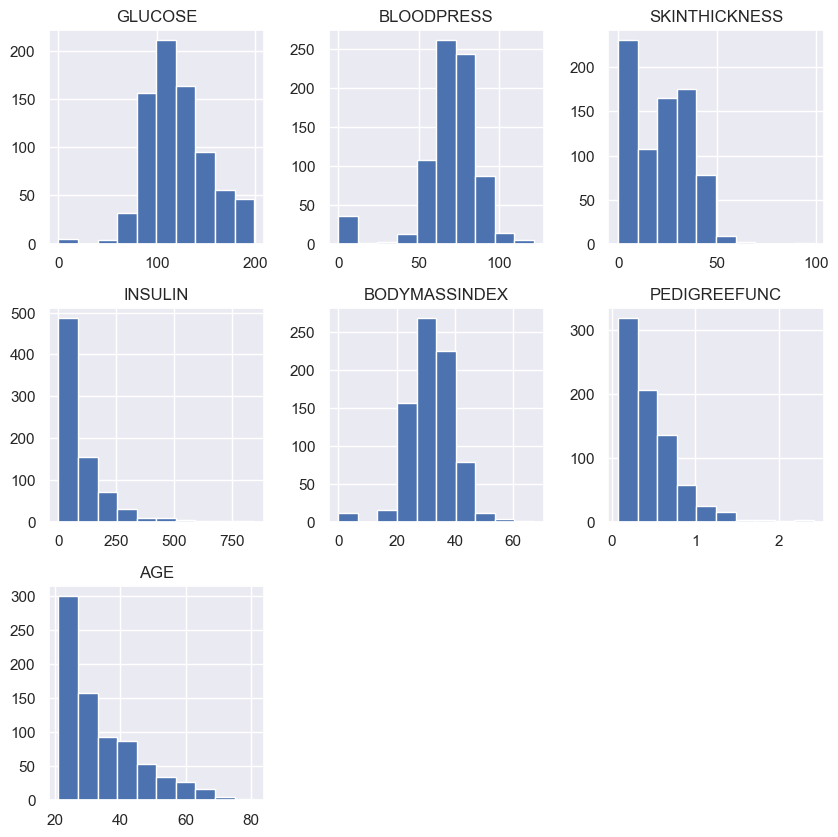

In [5]:
# Continious variables plot
df.drop(['PREGNANT', 'DIABETES'], axis=1).hist(figsize=(10,10))
plt.show()

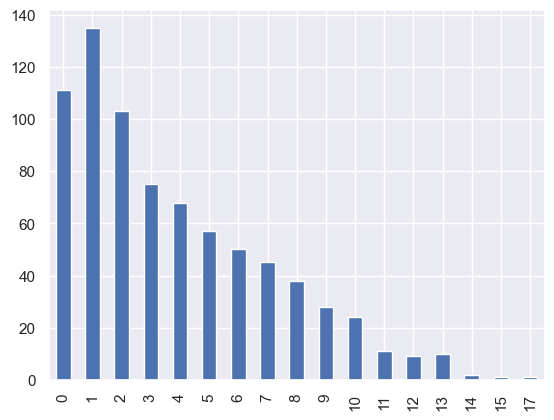

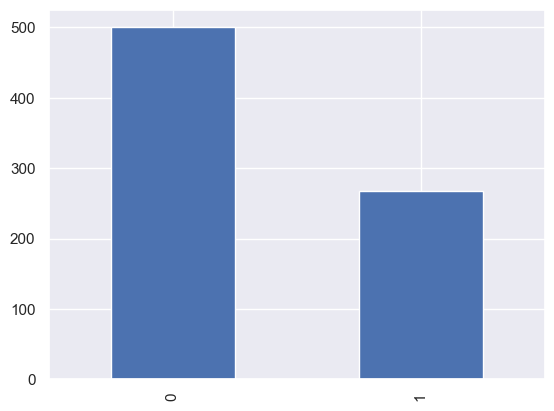

In [6]:
# Discrete variables plot
df['PREGNANT'].value_counts().sort_index().plot.bar()
plt.show()
df['DIABETES'].value_counts().sort_index().plot.bar()
plt.show()

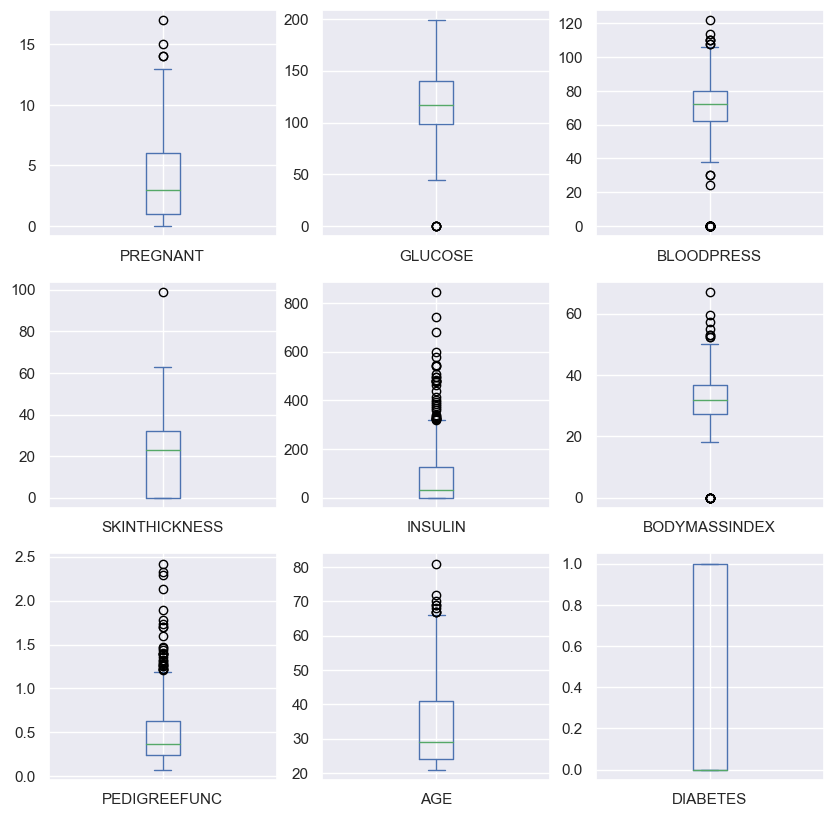

In [7]:
df.plot.box(subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(10,10))
plt.show()
# Outliers can be observed (not all of them, this is just a proyection in 1 dimension)

In [8]:
# Encode categorical values
df.DIABETES = df.DIABETES.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PREGNANT       768 non-null    int64   
 1   GLUCOSE        768 non-null    int64   
 2   BLOODPRESS     768 non-null    int64   
 3   SKINTHICKNESS  768 non-null    int64   
 4   INSULIN        768 non-null    int64   
 5   BODYMASSINDEX  768 non-null    float64 
 6   PEDIGREEFUNC   768 non-null    float64 
 7   AGE            768 non-null    int64   
 8   DIABETES       768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


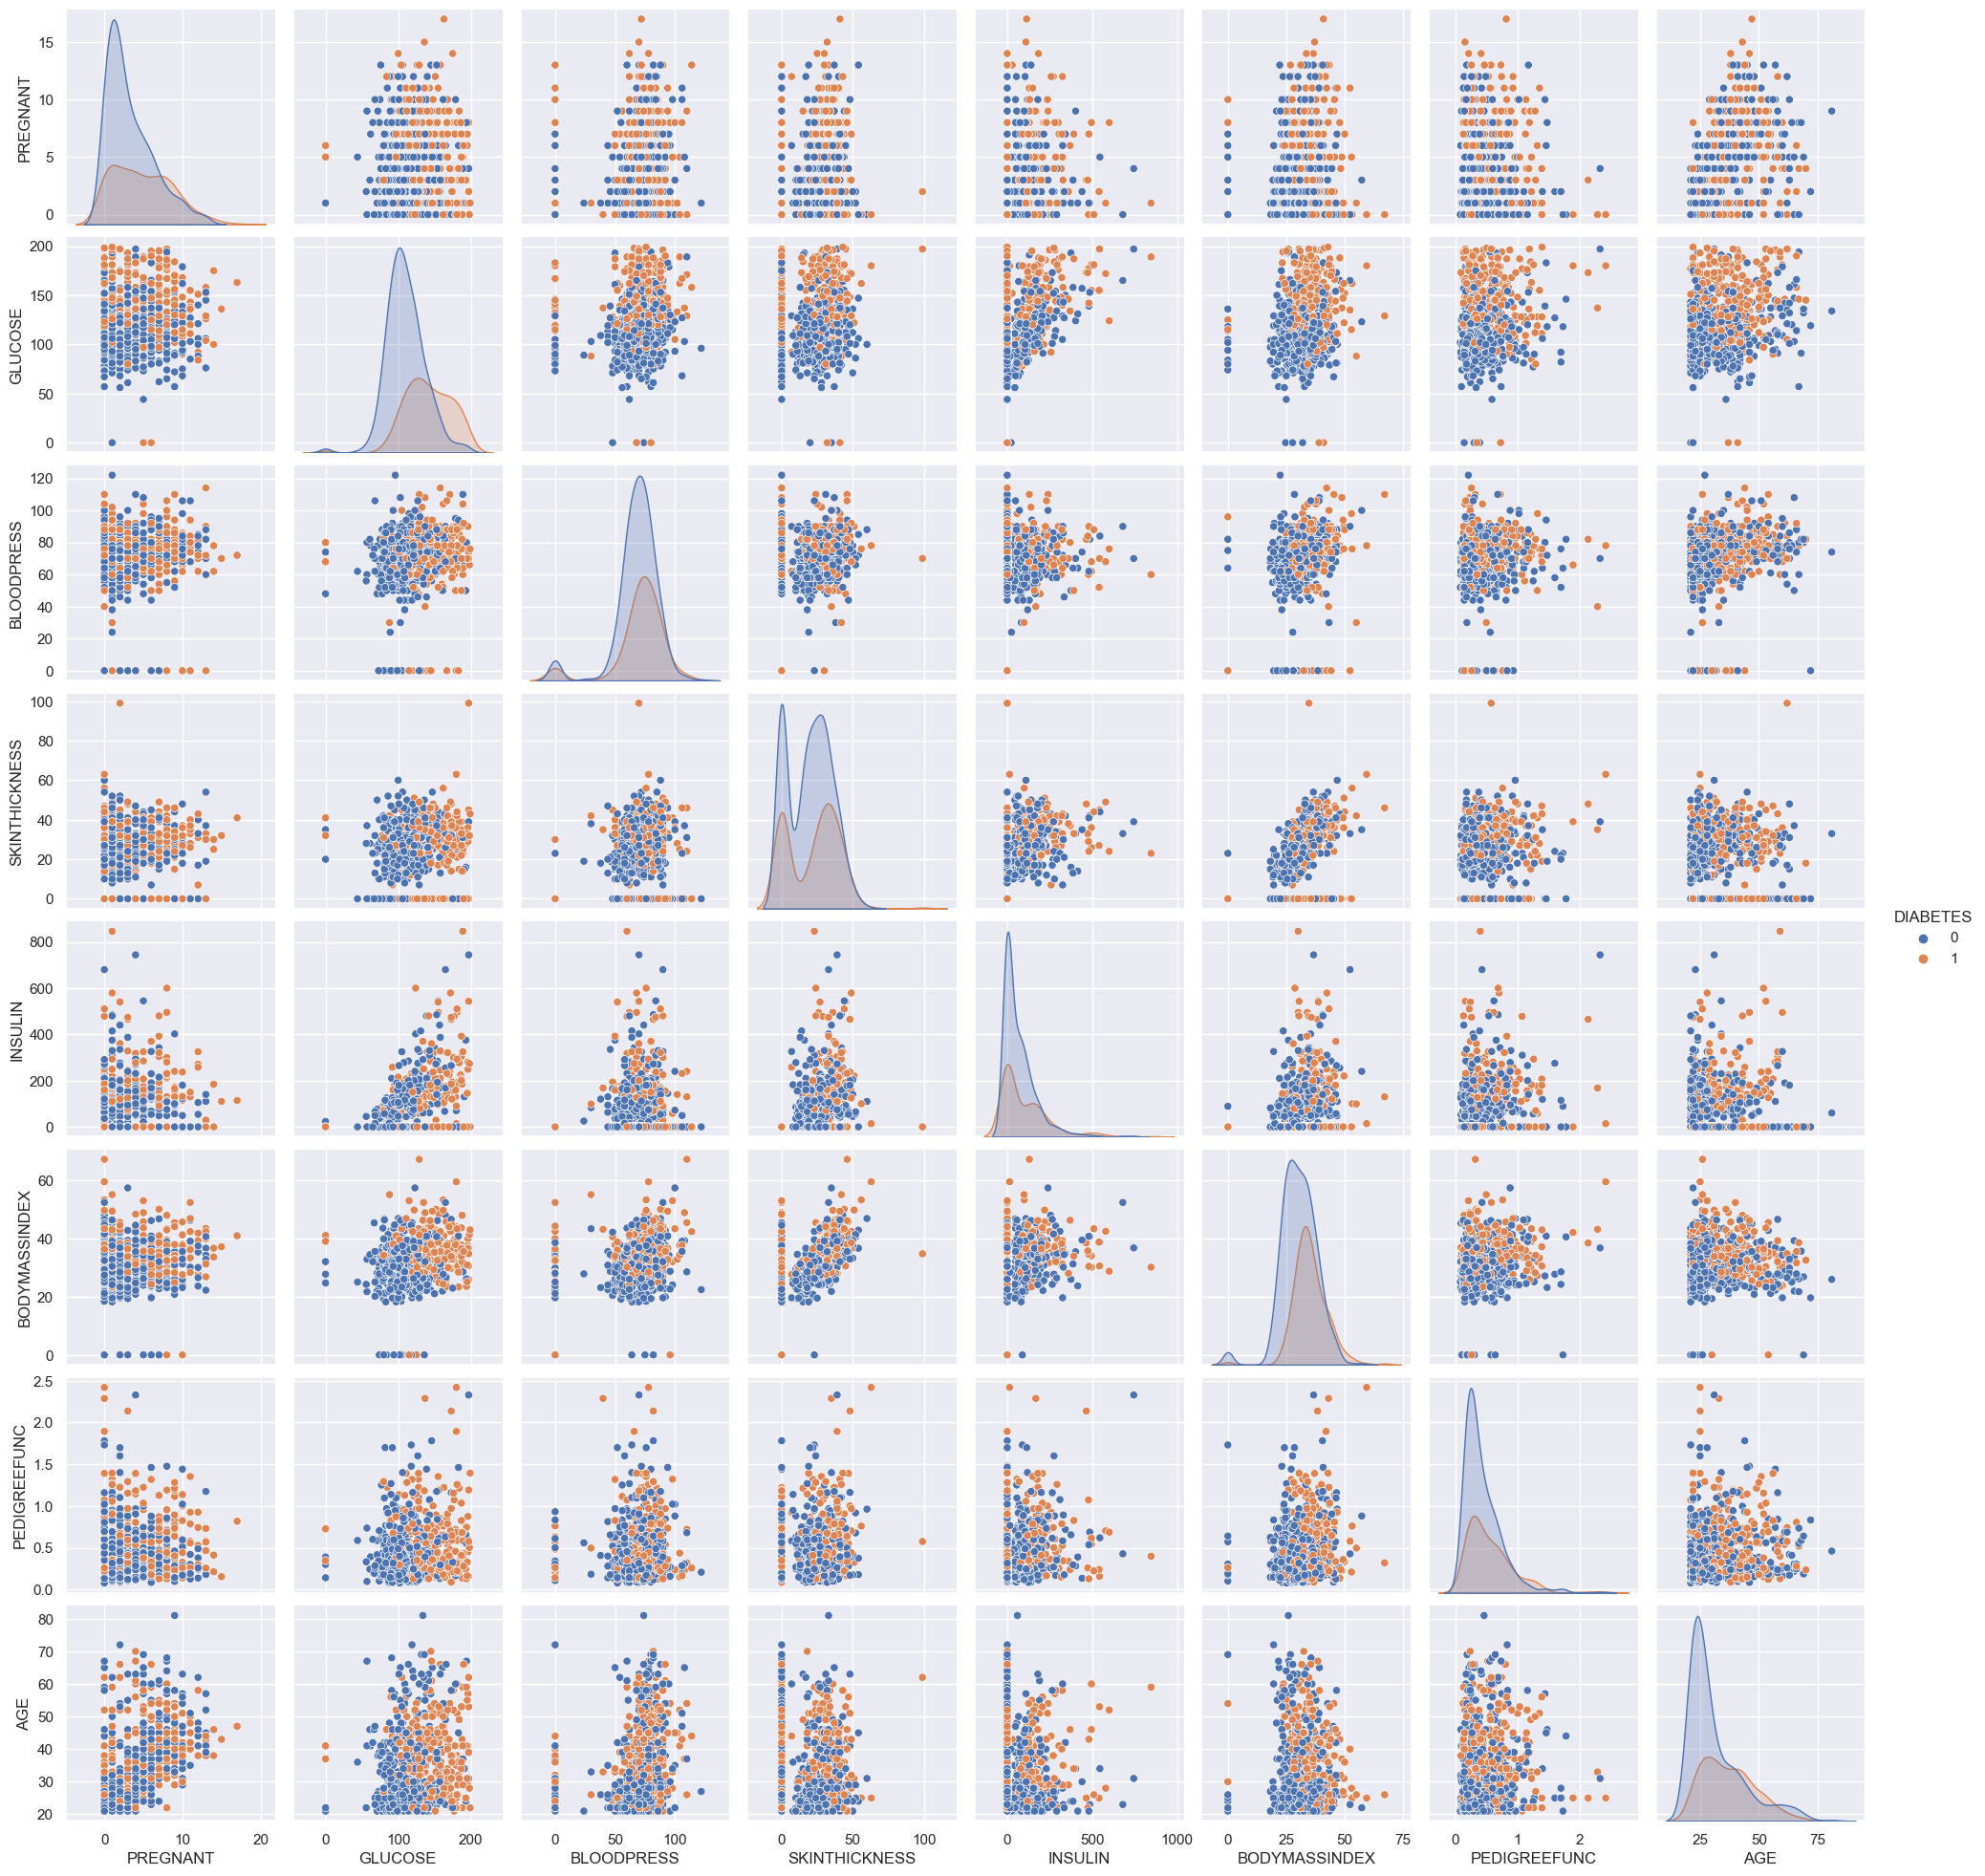

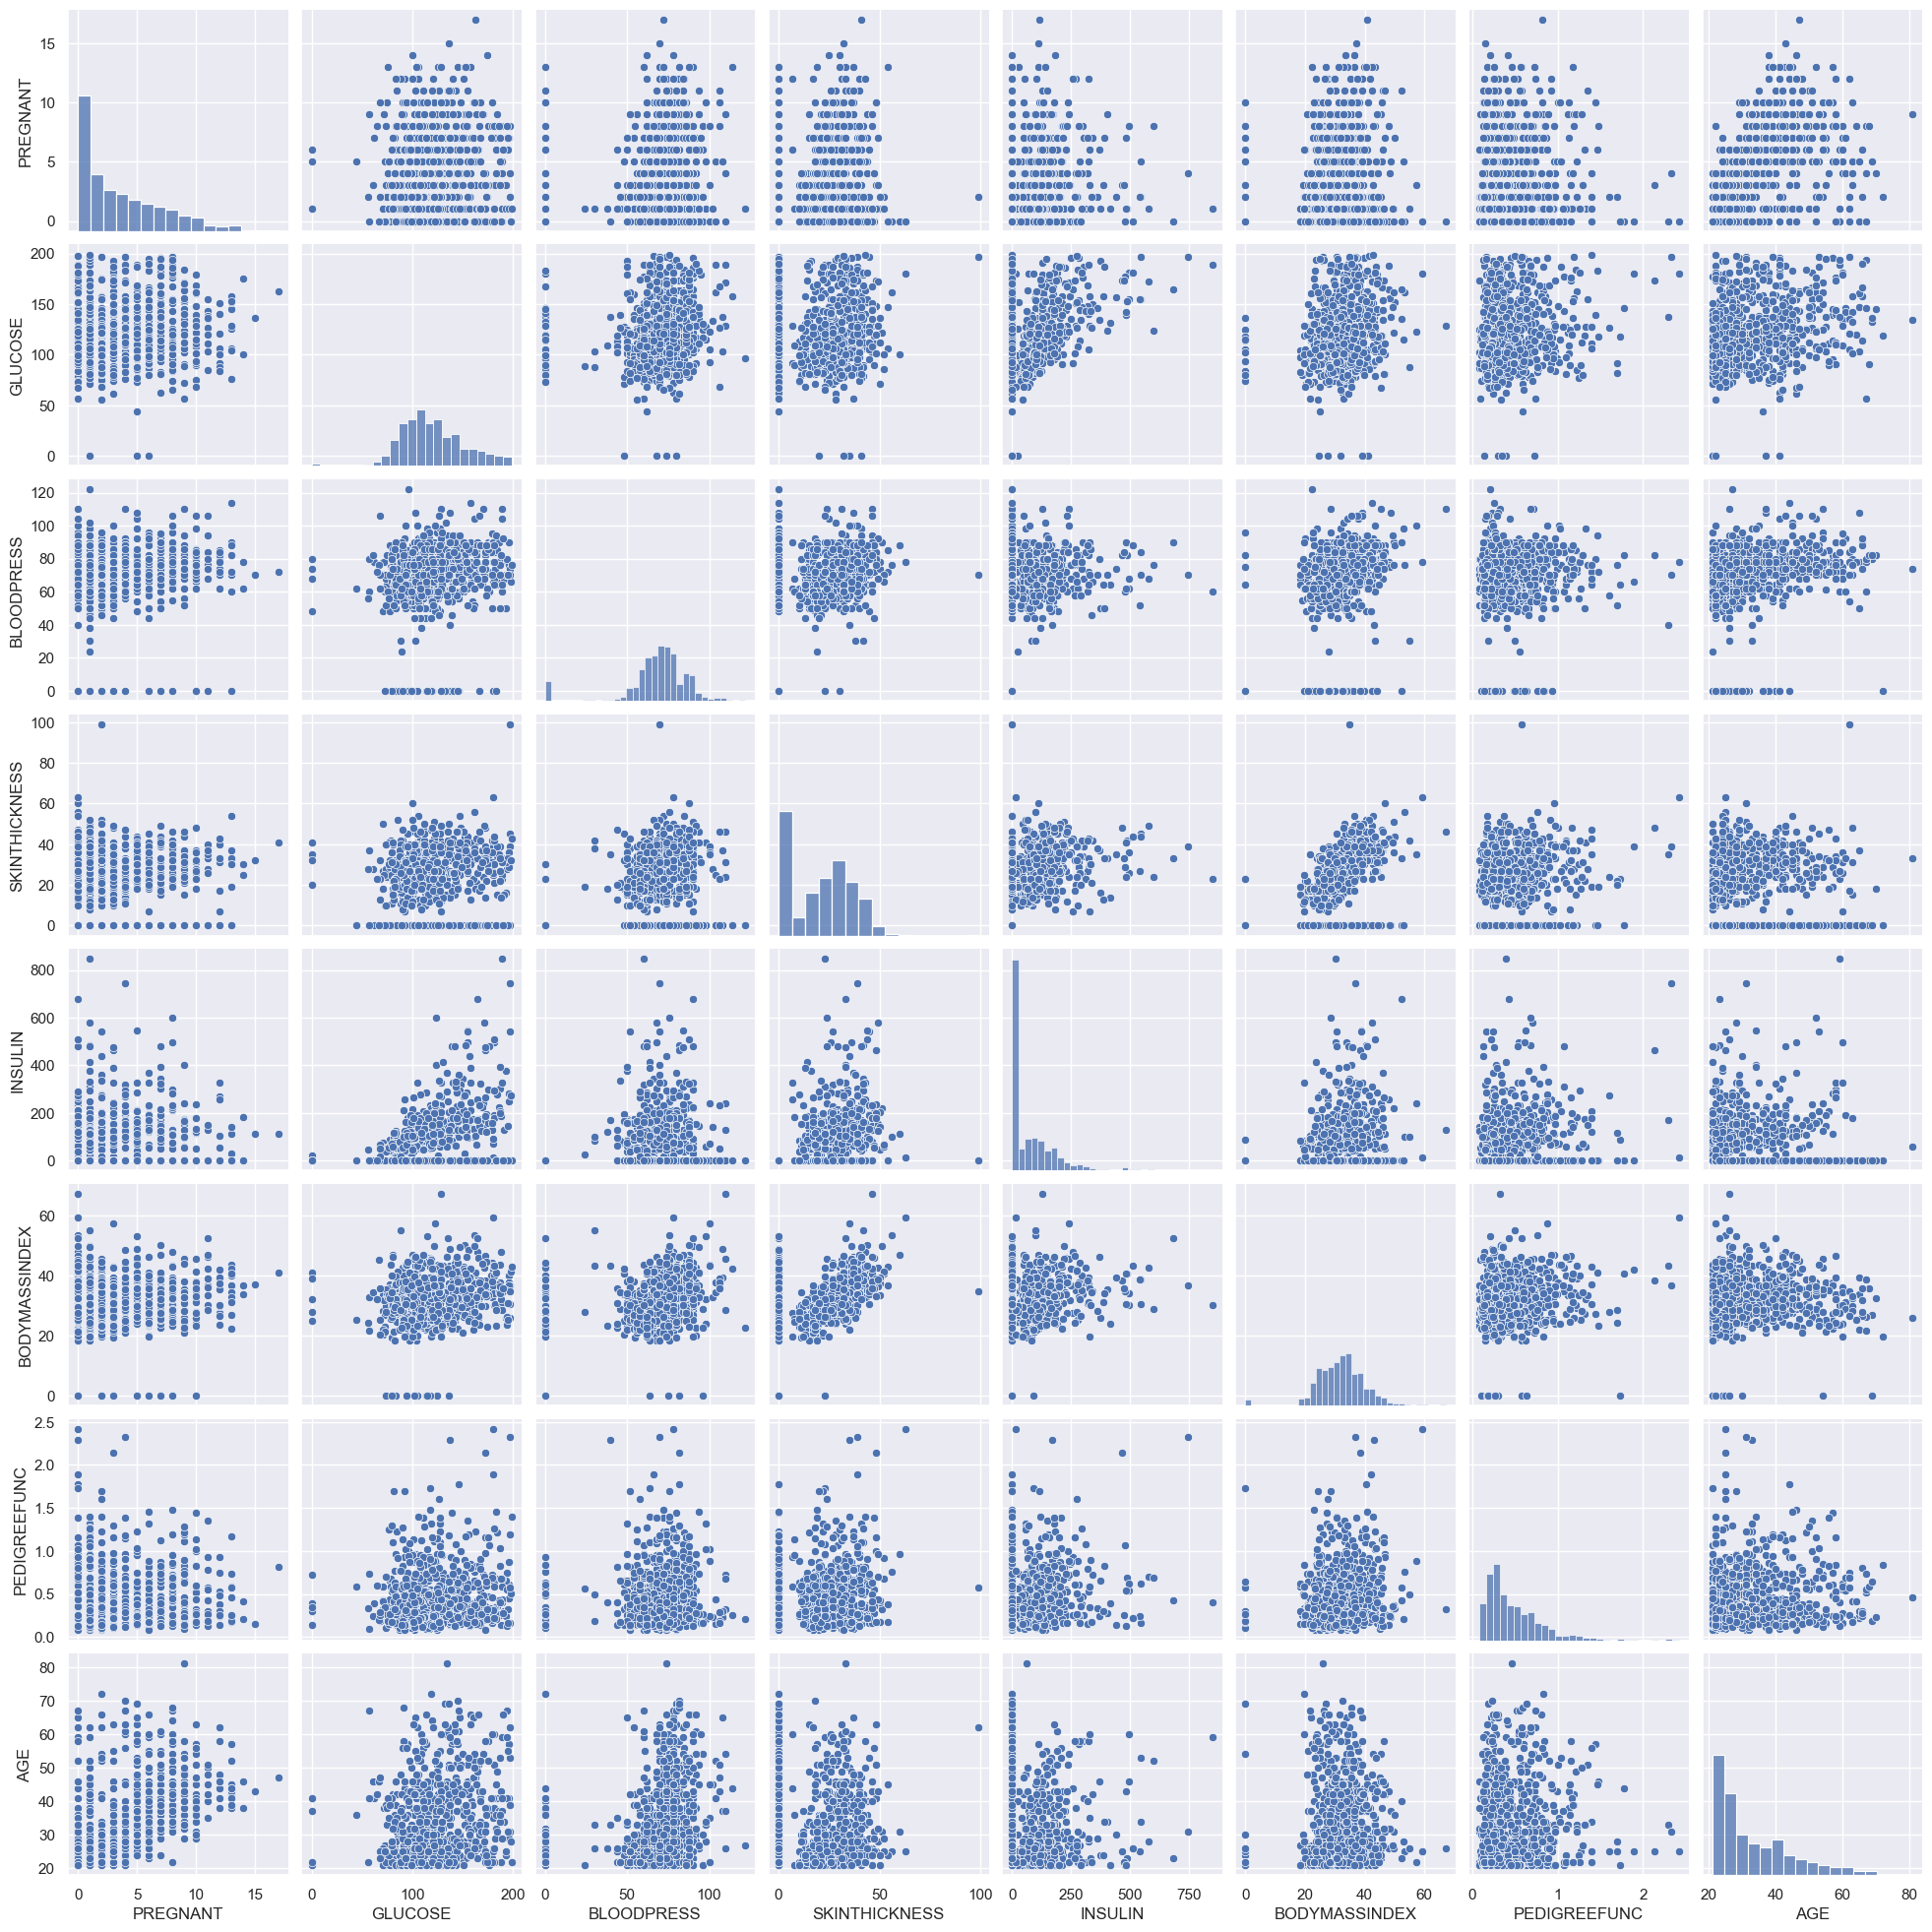

In [9]:
# Analyze continious variables

# Pairplot 
sns.pairplot(df, hue = 'DIABETES')
plt.show()
sns.pairplot(df)
plt.show()
# It can be observed some skewed variables, they can be normalized.

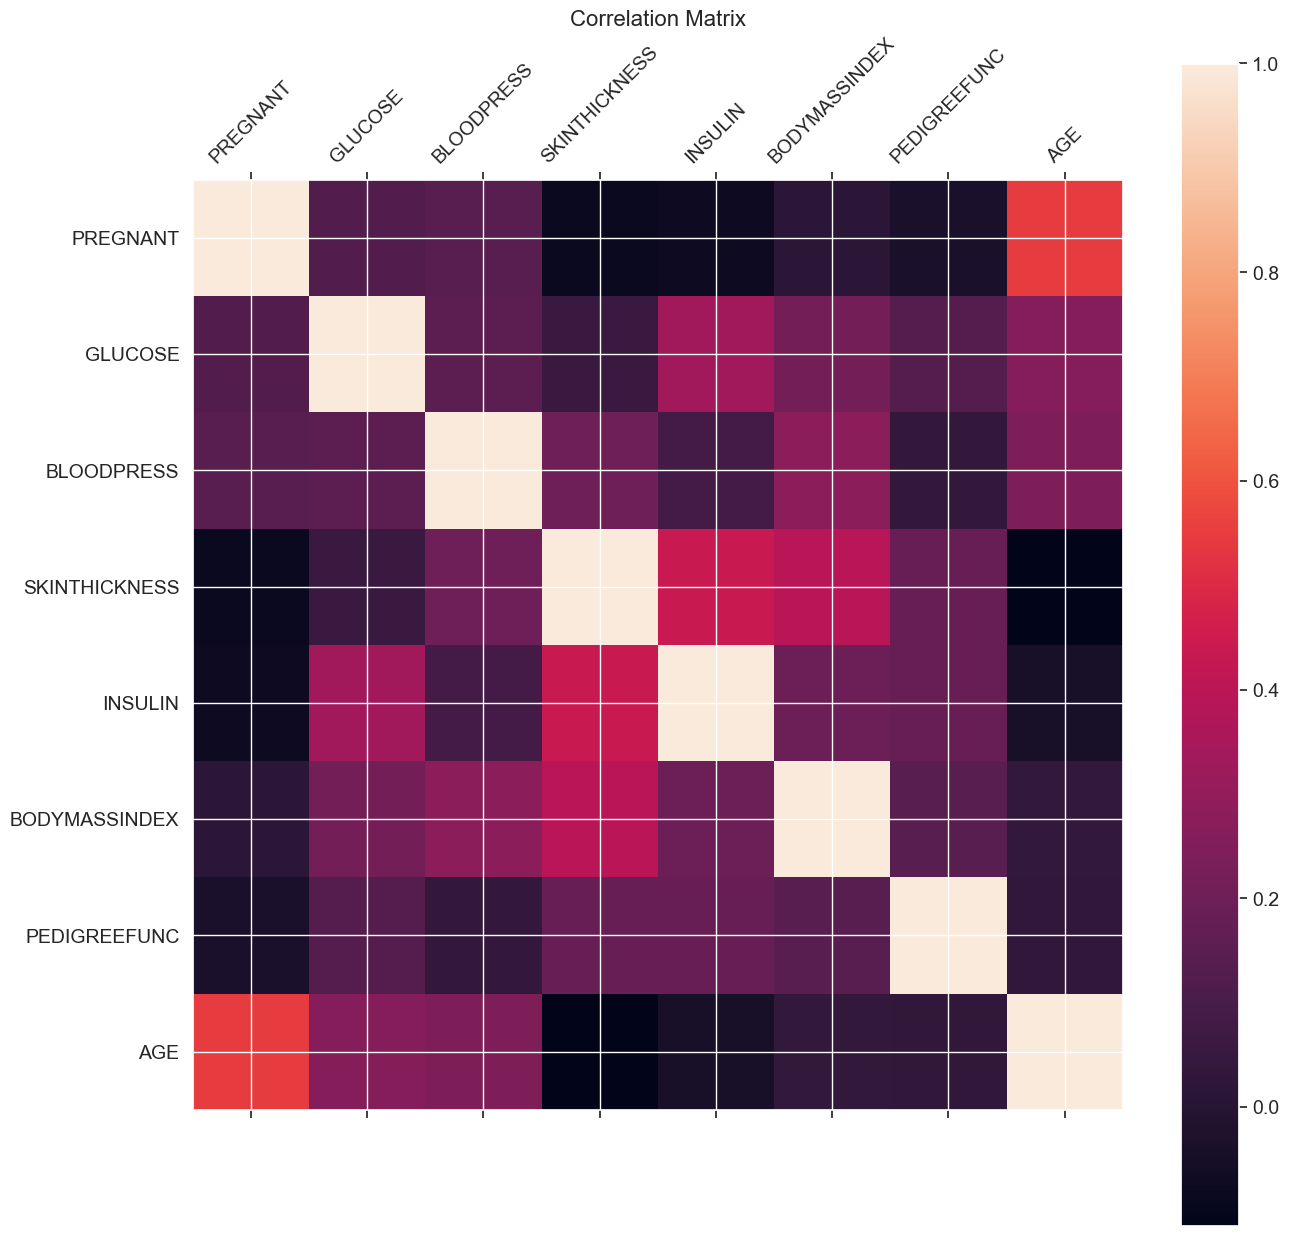

In [10]:
# Correlation plot
#correlation plot of numeric variables
f = plt.figure(figsize=(15,15))
plt.matshow(df.select_dtypes(include=['int64','float64']).corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(include=['int64','float64']).shape[1]), df.select_dtypes(include=['int64','float64']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(include=['int64','float64']).shape[1]), df.select_dtypes(include=['int64','float64']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()
# By looking at the plot, there are no variables correlated over 0.5

In [11]:
# Class imbalance
df['DIABETES'].value_counts()
# As we can see, class number 0 has double of rows than class number 1 (down-sampling or up-sampling could be used)

0    500
1    268
Name: DIABETES, dtype: int64

In [12]:
# Train test split

# Define input and output matrices
INPUTS = list(df.columns)
OUTPUT = 'DIABETES'
INPUTS.remove(OUTPUT)
X = df[INPUTS]
y = df[OUTPUT]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,  
                                                    random_state=0, 
                                                    stratify = y)  